In [1]:
from util.view import view_graph
from util.structures import AdjacencyList
from algorithms.breadth_first_search import bfs_recursive
from algorithms.dijkstras_shortest_path import dijkstra

In [3]:
graph = AdjacencyList(n=14)
graph.add_undirected_edge(0, 1)
graph.add_undirected_edge(0, 2)
graph.add_undirected_edge(0, 3)
graph.add_undirected_edge(2, 9)
graph.add_undirected_edge(8, 2)
graph.add_undirected_edge(3, 4)
graph.add_undirected_edge(10, 11)
graph.add_undirected_edge(12, 13)
graph.add_undirected_edge(3, 5)
graph.add_undirected_edge(5, 7)
graph.add_undirected_edge(5, 6)
graph.add_undirected_edge(0, 10)
graph.add_undirected_edge(11, 12)

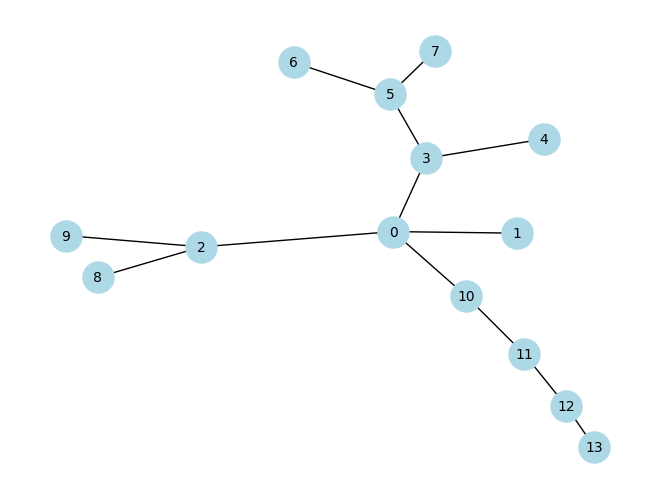

In [4]:
view_graph(graph, directed=False)

In [4]:
bfs_recursive(graph, 12)

6

In [5]:
graph.graph

[[(1, 0), (2, 0), (3, 0), (10, 0)],
 [(0, 0)],
 [(0, 0), (9, 0), (8, 0)],
 [(0, 0), (4, 0), (5, 0)],
 [(3, 0)],
 [(3, 0), (7, 0), (6, 0)],
 [(5, 0)],
 [(5, 0)],
 [(2, 0)],
 [(2, 0)],
 [(11, 0), (0, 0)],
 [(10, 0), (12, 0)],
 [(13, 0), (11, 0)],
 [(12, 0)]]

In [8]:
for node, neighbors in enumerate(graph):
    for neighbor in neighbors:
        print(neighbor)
        break
#       G.add_edge(node, neighbor)

(1, 0)
(0, 0)
(0, 0)
(0, 0)
(3, 0)
(3, 0)
(5, 0)
(5, 0)
(2, 0)
(2, 0)
(11, 0)
(10, 0)
(13, 0)
(12, 0)


# Dijkstra

In [2]:
graph = AdjacencyList(n=5)
graph.add_directed_edge(0, 1, 4)
graph.add_directed_edge(0, 2, 1)
graph.add_directed_edge(1, 3, 1)
graph.add_directed_edge(2, 1, 2)
graph.add_directed_edge(2, 3, 5)
graph.add_directed_edge(3, 4, 3)

In [3]:
graph.graph

[[(1, 4), (2, 1)], [(3, 1)], [(1, 2), (3, 5)], [(4, 3)], []]

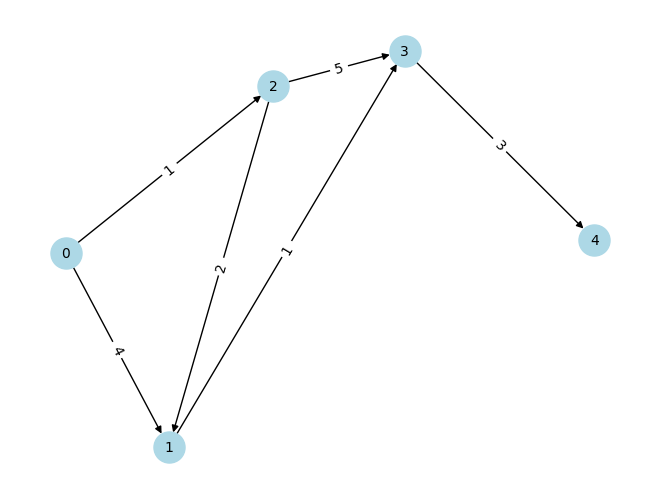

In [6]:
view_graph(graph)

In [9]:
dijkstra(graph, start=0, end=4)

7

In [101]:
import math
from heapq import heappush, heappop

EPS = 1e-6
n = len(graph)
start = 0

visited = [False] * n
prev = [None] * n
dist = [math.inf] * n
dist[start] = 0
pq = []
heappush(pq, (0, start))



In [131]:
visited

[True, False, True, False, False]

In [132]:
dist

[0, 3, 1, inf, inf]

In [133]:
prev

[None, 2, 0, None, None]

In [119]:
pq

[(1, 2), (4, 1)]

In [122]:
node_val, node_from = heappop(pq)

In [123]:
node_from

2

In [124]:
node_val

1

In [125]:
visited[node_from] = True

In [126]:
edges = graph[node_from]

In [127]:
edges

[(1, 2), (3, 5)]

In [128]:
for node_to, edge_cost in edges:
    print(node_to)
    print(edge_cost)
    break

1
2


In [129]:
new_dist = dist[node_from] + edge_cost
print(new_dist)

3


In [130]:
if new_dist < dist[node_to]:
    prev[node_to] = node_from
    dist[node_to] = new_dist
    heappush(pq, (dist[node_to], node_to))

In [ ]:


    while pq:
        node_from, node_val = heappop(pq)
        
        # We already visited this node and can ignore it
        if visited[node_from]:
            continue
        visited[node_from] = True

        # We already found a better path before we got to
        # processing this node so we can ignore it
        if dist[node_from] < node_val:
            continue

        edges = graph[node_from]
        for node_to, edge_cost in edges:
            # You cannot get a shorter path by revisiting
            # a node you have already visited before.
            if visited[node_to]:
                continue

            # Relax edge by updating minimum cost if applicable.
            new_dist = dist[node_from] + edge_cost
            if new_dist < dist[node_to]:
                prev[node_to] = node_from
                dist[node_to] = new_dist
                heappush(pq, (node_to, dist[node_to]))

        # Once we've visited all the nodes spanning from the end
        # node we know we can return the minimum distance value to
        # the end node because it cannot get any better after this point.
        if node_from == end:
            return dist[end]

    # End node is unreachable
    return math.inf

In [ ]:
class DijkstrasShortestPathAdjacencyList:


    def __init__(self, n, comparator=None):

        if comparator is not None:
            if not callable(comparator):
                raise ValueError("Comparator must be callable")
            self.comparator = comparator
        else:
            self.comparator = lambda node1, node2: (node1.value > node2.value) - (node1.value < node2.value)

    def reconstruct_path(self, start, end):
        if end < 0 or end >= self.n:
            raise ValueError("Invalid node index")
        if start < 0 or start >= self.n:
            raise ValueError("Invalid node index")
        dist = self.dijkstra(start, end)
        path = []
        if dist == math.inf:
            return path
        at = end
        while at is not None:
            path.append(at)
            at = self.prev[at]
        path.reverse()
        return path

    